## How to use Pretrained model..?
### e.g. VGG - 그냥 일자로 ~깊은 아이  
![Screenshot from 2025-01-20 16-31-31.png](<attachment:Screenshot from 2025-01-20 16-31-31.png>)
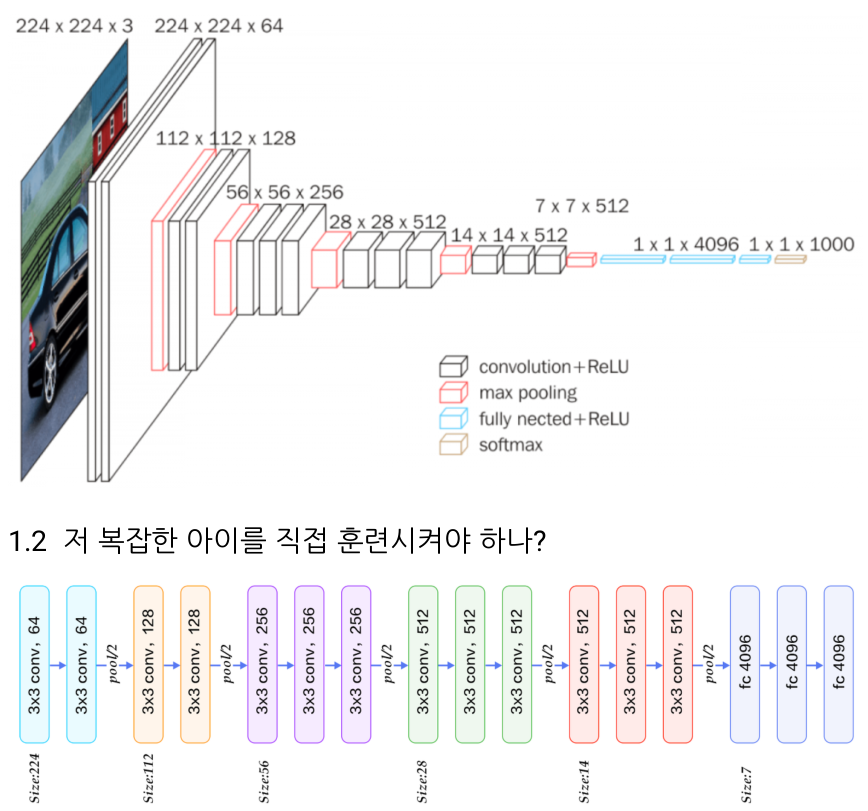

In [16]:
## 이미 tensorflow 가 학습된 모델을 가지고 있어서 우린 import만으로 그냥 사용이 가능하다. 
import cv2 
from tensorflow.keras.applications.vgg16 import VGG16 # 13 (convolutional layers) + 3 (fully connected layers)
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions

In [17]:
# 학습데이터는 imagenet으로 학습된 vgg16 model을 사용할 예정 
model = VGG16(weights='imagenet')

Data 구경하기\
imagenet data : https://www.kaggle.com/competitions/imagenet-object-localization-challenge/data\
imagenet label: https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a

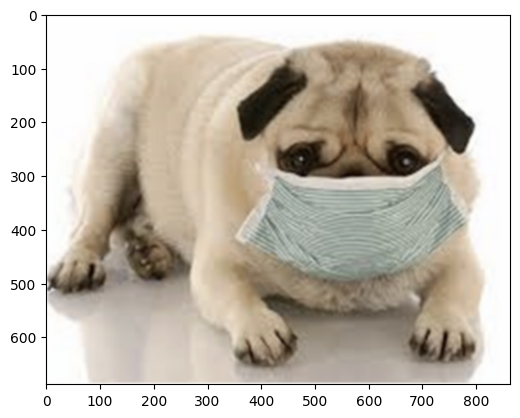

In [44]:
# 200만개의 사진으로 동물들 이름을 학습한 모델을 사용하기위해, 예시 뭉뭉이 사진을 가져와 보자
import matplotlib.pyplot as plt

image = cv2.imread('./data/dog.png')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [45]:
# Preprocessing by tensorflow function  
image = cv2.resize(image, dsize=(224, 224))  # dsize: output image size;
image = img_to_array(image) # (224,224, 3)
# convert into (batch_size, height, width, channels)
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))  # (1, 224, 224, 3)
image = preprocess_input(image)


In [46]:
yhat = model.predict(image)
label = decode_predictions(yhat)
label =label[0][0]
print("%s (%.2f%%)" % (label[1], label[2]*100))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
pug (82.40%)


In [47]:
# pug okay~ 
# Let's see top5 
decode_predictions(yhat)

[[('n02110958', 'pug', np.float32(0.8240078)),
  ('n03803284', 'muzzle', np.float32(0.062391885)),
  ('n02099712', 'Labrador_retriever', np.float32(0.029720958)),
  ('n02104029', 'kuvasz', np.float32(0.023646107)),
  ('n02091467', 'Norwegian_elkhound', np.float32(0.0056740856))]]

Call 'dogs and cats' data  

In [48]:
import os 

path = './data/train/'
full_names = os.listdir(path)
labels = [each.split('.')[0] for each in full_names]
file_id = [each.split('.')[1] for each in full_names]

In [49]:
import random 
import matplotlib.image as mpimg 

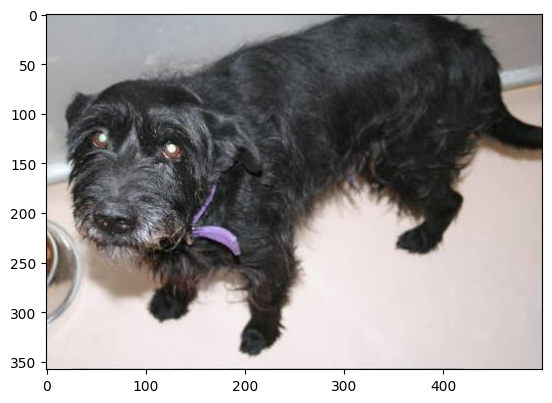

In [51]:
image = mpimg.imread(path + full_names[1])
plt.imshow(image)
plt.show()

border_terrier? ... 뭉뭉이 

In [52]:
image = cv2.resize(image, dsize = (224,224))
image = img_to_array(image)
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
image = preprocess_input(image)

In [53]:
yhat = model.predict(image)
label = decode_predictions(yhat)
label = label[0][0]
print("%s (%.2f%%)" % (label[1], label[2]*100))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
giant_schnauzer (72.35%)


In [31]:
def resize_and_preprocess_vgg(img):
    image = cv2.resize(image, dsiz = (224,224))
    image = img_to_array(image
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    return preprocess_input(image)